# NumPy Basics: Arrays and Vectorized Computation
# NumPy 基礎:陣列和向量化計算

## NumPy, short for Numerical Python, is the fundamental package required for high performance scientific computing and data analysis. It is the foundation on which nearly all of the higher-level tools in this book are built.

## Here are some of the things it provides:

## 1. ndarray, a fast and space-efficient multidimensional array providing vectorized arithmetic operations and sophisticated broadcasting capabilities

## 2. Standard mathematical functions for fast operations on entire arrays of data without having to write loops

## 3. Tools for reading / writing array data to disk and working with memory-mapped files

## 4. Linear algebra, random number generation, and Fourier transform capabilities

## 5. Tools for integrating code written in C, C++, and Fortran

## Because NumPy provides an easy-to-use C API, it is very easy to pass data to external libraries written in a low-level language and also for external libraries to return data to Python as NumPy arrays. This feature has made Python a language of choice for wrapping legacy C/C++/Fortran codebases and giving them a dynamic and easy-to-use interface.

## While NumPy by itself does not provide very much high-level data analytical functionality, having an understanding of NumPy arrays and array-oriented computing will help you use tools like pandas much more effectively. If you’re new to Python and just looking to get your hands dirty working with data using pandas, feel free to give this chapter a skim. For more on advanced NumPy features like broadcasting.

## For most data analysis applications, the main areas of functionality I’ll focus on are:

## 1. Fast vectorized array operations for data munging and cleaning, subsetting and filtering, transformation, and any other kinds of computations

## 2. Common array algorithms like sorting, unique, and set operations

## 3. Efficient descriptive statistics and aggregating/summarizing data

## 4. Data alignment and relational data manipulations for merging and joining together heterogeneous data sets

## 5. Expressing conditional logic as array expressions instead of loops with if-elif-else branches

## 6. Group-wise data manipulations (aggregation, transformation, function application). Much more on this in Chapter 5

## While NumPy provides the computational foundation for these operations, you will likely want to use pandas as your basis for most kinds of data analysis (especially for structured or tabular data) as it provides a rich, high-level interface making most common data tasks very concise and simple. pandas also provides some more domain-specific functionality like time series manipulation, which is not present in NumPy.

## NumPy 在 Python的數值運算中地位崇高的原因之一，就是因為它的設計是有效率地處理大型資料陣列，其中包括:

## NumPy 內部在儲存資料時，是儲存在連續的記憶體中，這一點和其他Python的物件不同。NumPy的演算法函式庫適用C語言寫的，可以無負擔的直接存取那塊記憶體，不需要做任何形態檢查或其他動作。和內建的Python序列相比，NumPy陣列也使用較少的記憶體。

## NumPy可以對整個陣列進行複雜的運算，不需要Python的 for 迴圈。

## 比較有一百萬整數的NumPy陣列以及有一百萬整數的Python list。

In [2]:
import numpy as np
my_arr = np.arange(1000000)
my_list = list(range(1000000))

# 現在將兩者所有元素都成乘以2

In [3]:
%time for _ in range(10): my_arr2 = my_arr * 2

Wall time: 158 ms


In [4]:
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

Wall time: 5.69 s


# The NumPy ndarray: A Multidimensional Array Object 多維陣列物件

## One of the key features of NumPy is its N-dimensional array object, or ndarray, which is a fast, flexible container for large data sets in Python. Arrays enable you to perform mathematical operations on whole blocks of data using similar syntax to the equivalent operations between scalar elements:

In [7]:
import numpy as np
# Generate some random data
data = np.random.randn(2, 3)
data

array([[ 0.16278981, -0.72710092,  0.5256924 ],
       [-1.41491766,  0.12858173, -0.88418611]])

In [8]:
data * 10
data + data

array([[ 0.32557962, -1.45420183,  1.05138479],
       [-2.82983532,  0.25716347, -1.76837222]])

## An ndarray is a generic multidimensional container for homogeneous data;  that is, all of the elements must be the same type. Every array has a shape, a tuple indicating the size of each dimension, and a dtype, an object describing the data type of the array:

In [9]:
data.shape

(2, 3)

In [10]:
data.dtype

dtype('float64')

## This chapter will introduce you to the basics of using NumPy arrays, and should be sufficient for following along with the rest of the book. While it’s not necessary to have a deep understanding of NumPy for many data analytical applications, becoming proficient in array-oriented programming and thinking is a key step along the way to becoming a scientific Python guru.

### Note: array, NumPyarray, ndarray refer to 'ndarray' in this text

### Creating ndarrays  建立ndarray
### 建立陣列最簡單的方法，就是使用array函式，它可以接受任何序列物件作為參數(包括其他陣列)，並產生一個包含傳入資料的新NumPy陣列，舉例來說，list就是一個很適合的傳入物件。

In [11]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [12]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]] #也可以用巢式list，兩個等長的list組成的list，會被轉成多維陣列。
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [13]:
arr2.ndim #用ndim和shape屬性來確認data2的維度與shape。

2

In [14]:
arr2.shape

(2, 4)

In [15]:
arr1.dtype #除非指定，np.array會試圖為自己建立的陣列找一個適當的型態。並把它儲存在一個名為dtype的metadata物件中。

dtype('float64')

In [16]:
arr2.dtype

dtype('int32')

In [17]:
np.zeros(10) #建立全是0的陣列。

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [18]:
np.zeros((3, 6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [19]:
np.empty((2, 3, 2)) #不能假設np.empty建立的陣列內容都是0，如下會得到未初始化的垃圾值。

array([[[9.93002922e-312, 3.16202013e-322],
        [0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 8.23616385e-067]],

       [[2.00465003e-052, 2.00580530e-052],
        [7.40905465e-038, 1.44975915e-047],
        [2.12547704e+160, 3.15777217e-033]]])

In [20]:
np.arange(15) #類似Python內建的range函式，arange是它的陣列值版本。

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

# 表4-1

# Table 4-1. Array creation functions

## Function: 
### Description
## array:
### Convert input data (list, tuple, array, or other sequence type) to an ndarray either by inferring a dtype or explicitly specifying a dtype. Copies the input data by default.

## asarray:
### Convert input to ndarray, but do not copy if the input is already an ndarray
## arange:
### Like the built-in range but returns an ndarray instead of a list.
## ones, ones_like:
### Produce an array of all 1’s with the given shape and dtype. ones_like takes another array and produces a ones array of the same shape and dtype.
## zeros, zeros_like:
### Like ones and ones_like but producing arrays of 0’s instead
## empty, empty_like:
### Create new arrays by allocating new memory, but do not populate with any values like ones and zeros
## eye, identity:
### Create a square N x N identity matrix (1’s on the diagonal and 0’s elsewhere)

### Data Types for ndarrays

In [21]:
arr1 = np.array([1, 2, 3], dtype=np.float64)

In [22]:
arr2 = np.array([1, 2, 3], dtype=np.int32)

In [23]:
arr1.dtype

dtype('float64')

In [24]:
arr2.dtype

dtype('int32')

In [25]:
arr = np.array([1, 2, 3, 4, 5])
arr.dtype

dtype('int32')

In [26]:
float_arr = arr.astype(np.float64)
float_arr.dtype

dtype('float64')

In [27]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr

array([ 3.7, -1.2, -2.6,  0.5, 12.9, 10.1])

In [28]:
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10])

In [29]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

In [30]:
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [31]:
empty_uint32 = np.empty(8, dtype='u4')
empty_uint32

array([         0, 1075314688,          0, 1075707904,          0,
       1075838976,          0, 1072693248], dtype=uint32)

### Arithmetic with NumPy Arrays， NumPy陣列的算術運算

In [32]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [33]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [34]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

In [35]:
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [36]:
arr ** 0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

In [37]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])

In [38]:
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [39]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

### Basic Indexing and Slicing，基本的索引和切片

In [40]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [41]:
arr[5]

5

In [42]:
arr[5:8]

array([5, 6, 7])

In [43]:
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [44]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

In [45]:
arr_slice[1] = 12345
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

In [46]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [47]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

array([7, 8, 9])

In [48]:
arr2d[0][2]

3

In [49]:
arr2d[0, 2]

3

In [50]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [51]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [52]:
old_values = arr3d[0].copy() #可以將常數或陣列指定給arr3d[0]
arr3d[0] = 42

In [53]:
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [54]:
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [55]:
arr3d[1, 0] #找到arr3d索引區間(1,0)的所有值，然後回傳一維陣列。

array([7, 8, 9])

In [56]:
x = arr3d[1]
x

array([[ 7,  8,  9],
       [10, 11, 12]])

In [57]:
x[0]

array([7, 8, 9])

#### Indexing with slices，用切片做索引。

In [58]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [59]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

In [60]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [61]:
arr2d[:2] #如您所見，切片時是沿著第1軸，也就是0軸做切片，每個切片就會沿著軸把一整個區間的元素都選取，如果把arr2d[:2]念成"選取arr2d開頭兩個列"應該會有點幫助。

array([[1, 2, 3],
       [4, 5, 6]])

In [63]:
arr2d[:2, 1:] # 這樣切片時，你所得到的回傳陣列view和原來的陣列必為相同維度。但若混合整數索引和切片使用，你就會得到較低維度的切片。

array([[2, 3],
       [5, 6]])

In [64]:
arr2d[1, :2] #選取第二列中開頭的兩行

array([4, 5])

In [65]:
arr2d[:2, 2] #選取第三行，但只限於開頭兩列。

array([3, 6])

In [66]:
arr2d[:, :1] #只寫一個冒號的表示整軸都要取，所以你可以用左邊的方法去取較高維度的軸。

array([[1],
       [4],
       [7]])

In [67]:
arr2d[:2, 1:] = 0 #對切片範圍指定值
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

### Boolean Indexing 布林索引

In [68]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [69]:
data

array([[-0.65851905, -0.12257209, -1.340496  , -1.48154108],
       [ 0.3239982 , -1.37868376,  0.60815349, -0.08509484],
       [-0.91165431, -1.55996641,  1.09784224, -1.66866748],
       [-0.04934172,  0.51959453, -0.58767625, -0.42765648],
       [-0.08135628,  0.15507614,  0.78453541, -1.34578062],
       [-0.25053569,  0.25354565, -0.00938767, -0.04112909],
       [ 1.01869178, -1.09035331,  1.62936841, -0.09294637]])

In [70]:
names == 'Bob' #names和字串'Bob'進行比較的動作，會產生一個布林陣列。

array([ True, False, False,  True, False, False, False])

In [71]:
data[names == 'Bob'] #這個布林陣列可以用於陣列索引

array([[-0.65851905, -0.12257209, -1.340496  , -1.48154108],
       [-0.04934172,  0.51959453, -0.58767625, -0.42765648]])

In [72]:
data[names == 'Bob', 2:] #進行索引選取

array([[-1.340496  , -1.48154108],
       [-0.58767625, -0.42765648]])

In [73]:
data[names == 'Bob', 3]

array([-1.48154108, -0.42765648])

In [74]:
names != 'Bob' #選擇不為'Bob'的列，可用 != 或 ~: 

array([False,  True,  True, False,  True,  True,  True])

In [75]:
data[~(names == 'Bob')]

array([[ 0.3239982 , -1.37868376,  0.60815349, -0.08509484],
       [-0.91165431, -1.55996641,  1.09784224, -1.66866748],
       [-0.08135628,  0.15507614,  0.78453541, -1.34578062],
       [-0.25053569,  0.25354565, -0.00938767, -0.04112909],
       [ 1.01869178, -1.09035331,  1.62936841, -0.09294637]])

In [76]:
cond = names == 'Bob' #運算子 ~ 在你想做反向條件時非常好用
data[~cond]

array([[ 0.3239982 , -1.37868376,  0.60815349, -0.08509484],
       [-0.91165431, -1.55996641,  1.09784224, -1.66866748],
       [-0.08135628,  0.15507614,  0.78453541, -1.34578062],
       [-0.25053569,  0.25354565, -0.00938767, -0.04112909],
       [ 1.01869178, -1.09035331,  1.62936841, -0.09294637]])

In [77]:
mask = (names == 'Bob') | (names == 'Will') #想從三個名字裡面去選擇兩個時，就使用布林算術運算子合併布林條件像是 &(且) 和 |(或)
mask

array([ True, False,  True,  True,  True, False, False])

In [78]:
data[mask]

array([[-0.65851905, -0.12257209, -1.340496  , -1.48154108],
       [-0.91165431, -1.55996641,  1.09784224, -1.66866748],
       [-0.04934172,  0.51959453, -0.58767625, -0.42765648],
       [-0.08135628,  0.15507614,  0.78453541, -1.34578062]])

In [79]:
data[data < 0] = 0 #將data中負值都設為零
data

array([[0.        , 0.        , 0.        , 0.        ],
       [0.3239982 , 0.        , 0.60815349, 0.        ],
       [0.        , 0.        , 1.09784224, 0.        ],
       [0.        , 0.51959453, 0.        , 0.        ],
       [0.        , 0.15507614, 0.78453541, 0.        ],
       [0.        , 0.25354565, 0.        , 0.        ],
       [1.01869178, 0.        , 1.62936841, 0.        ]])

In [80]:
data[names != 'Joe'] = 7 #利用一維布林陣列，去設定整行或整列的值。
data

array([[7.        , 7.        , 7.        , 7.        ],
       [0.3239982 , 0.        , 0.60815349, 0.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.25354565, 0.        , 0.        ],
       [1.01869178, 0.        , 1.62936841, 0.        ]])

### Fancy Indexing 花式索引

In [81]:
arr = np.empty((8, 4)) #設一個8x4的陣列
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [82]:
arr[[4, 3, 0, 6]] #以特定的順序選取列，只需用一個指定順序的整數list或ndarray即可。

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [83]:
arr[[-3, -5, -7]] #用負數可以從尾端開始選列。

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [84]:
arr = np.arange(32).reshape((8, 4)) #若是傳入多個索引陣列，做出的效果又不同了。它會將指定的index結成tuple後把對應位置的值抓成一維陣列回傳。
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [85]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]] #將(1,0)(5,3)(7,1)(2,2)的元素選取出來了。

array([ 4, 23, 29, 10])

In [86]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]] #對角

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

### Transposing Arrays and Swapping Axes 轉置陣列和軸交換

In [126]:
arr = np.arange(15).reshape((3, 5))

In [127]:
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [128]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [129]:
arr = np.random.randn(6, 3)
arr

array([[ 0.03154015,  0.80496958,  0.15339439],
       [-0.57085813, -0.28008019,  0.57969049],
       [ 0.50059489,  1.14021635,  1.41981559],
       [ 1.31022969,  0.02686412,  0.12641028],
       [ 1.71765606,  0.40068357,  1.03625416],
       [ 1.99720674, -0.96872524,  0.39415787]])

In [130]:
np.dot(arr.T, arr)

array([[ 9.23334797, -0.45524847,  3.11743897],
       [-0.45524847,  3.12621187,  1.6167902 ],
       [ 3.11743897,  1.6167902 ,  3.62060988]])

In [131]:
arr = np.arange(16).reshape((2, 2, 4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [132]:
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [133]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [134]:
arr.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

## Universal Functions: Fast Element-Wise Array Functions 全域函式:快速元素級別陣列函式

In [152]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [153]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [154]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [155]:
x = np.random.randn(8)
y = np.random.randn(8)

In [156]:
x

array([-0.44377303,  0.51395177, -0.89097225,  1.13251683, -0.32760602,
        0.74631427, -1.26834956,  1.7551081 ])

In [157]:
y

array([ 2.41898997, -1.6492635 , -0.68628868, -0.87021874, -0.66729604,
       -0.10625673, -0.06267913, -0.28573143])

In [158]:
np.maximum(x, y)

array([ 2.41898997,  0.51395177, -0.68628868,  1.13251683, -0.32760602,
        0.74631427, -0.06267913,  1.7551081 ])

In [159]:
arr = np.random.randn(7) * 5

In [160]:
arr

array([-3.34808492, -1.7950383 ,  4.06911665,  2.1819119 , -2.23347953,
       -4.69239463, -2.16953082])

In [161]:
remainder, whole_part = np.modf(arr)

In [162]:
remainder

array([-0.34808492, -0.7950383 ,  0.06911665,  0.1819119 , -0.23347953,
       -0.69239463, -0.16953082])

In [163]:
whole_part

array([-3., -1.,  4.,  2., -2., -4., -2.])

In [164]:
arr

array([-3.34808492, -1.7950383 ,  4.06911665,  2.1819119 , -2.23347953,
       -4.69239463, -2.16953082])

In [165]:
np.sqrt(arr)

C:\Users\sarah\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([       nan,        nan, 2.01720516, 1.47712961,        nan,
              nan,        nan])

In [166]:
np.sqrt(arr, arr)

C:\Users\sarah\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([       nan,        nan, 2.01720516, 1.47712961,        nan,
              nan,        nan])

In [167]:
arr

array([       nan,        nan, 2.01720516, 1.47712961,        nan,
              nan,        nan])

## Array-Oriented Programming with Arrays 用陣列寫陣列導向程式

In [168]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points 1000個等距點

In [169]:
xs, ys = np.meshgrid(points, points)

In [170]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [171]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

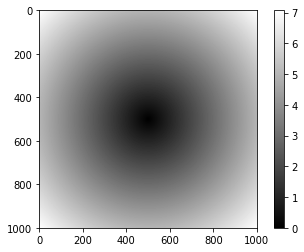

In [174]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()

Text(0.5,1,'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

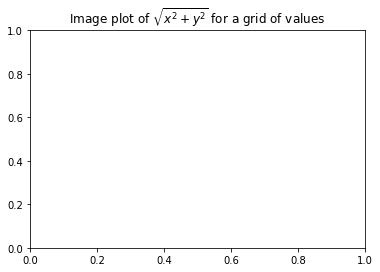

In [175]:
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

In [176]:
plt.draw()

<Figure size 432x288 with 0 Axes>

In [177]:
plt.close('all')

### Expressing Conditional Logic as Array Operations 用陣列運算表達條件邏輯

In [178]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [179]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

In [181]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [182]:
arr = np.random.randn(4, 4)
arr

array([[-0.57952208,  0.59219305,  0.43511328, -1.81296748],
       [ 1.04186578,  1.42201802, -0.45555953,  0.32608083],
       [-1.25226687, -0.0448453 , -1.19950677,  0.4779652 ],
       [-1.31375176,  0.09600815,  0.29617822,  0.54729265]])

In [183]:
arr > 0

array([[False,  True,  True, False],
       [ True,  True, False,  True],
       [False, False, False,  True],
       [False,  True,  True,  True]])

In [184]:
np.where(arr > 0, 2, -2)

array([[-2,  2,  2, -2],
       [ 2,  2, -2,  2],
       [-2, -2, -2,  2],
       [-2,  2,  2,  2]])

In [185]:
np.where(arr > 0, 2, arr) # set only positive values to 2 只將正數設為2

array([[-0.57952208,  2.        ,  2.        , -1.81296748],
       [ 2.        ,  2.        , -0.45555953,  2.        ],
       [-1.25226687, -0.0448453 , -1.19950677,  2.        ],
       [-1.31375176,  2.        ,  2.        ,  2.        ]])

### Mathematical and Statistical Methods 數學和統計方法

In [186]:
arr = np.random.randn(5, 4)
arr

array([[-1.58283954,  0.55359278,  2.31674136,  0.45917344],
       [-0.82514347, -0.85865728,  0.18263464,  0.20133625],
       [-0.42151513,  1.3172234 , -1.93065371,  0.2409362 ],
       [ 0.20627032,  1.19733382, -0.68784121,  1.96557738],
       [-1.13566377, -0.37347143, -0.1081467 ,  0.62689001]])

In [187]:
arr.mean()

0.06718886920403026

In [188]:
np.mean(arr)

0.06718886920403026

In [189]:
arr.sum()

1.3437773840806053

In [190]:
arr.mean(axis=1)

array([ 0.43666701, -0.32495746, -0.19850231,  0.67033508, -0.24759797])

In [191]:
arr.sum(axis=0)

array([-3.75889158,  1.83602129, -0.22726562,  3.49391329])

In [192]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])

In [193]:
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28], dtype=int32)

In [194]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [195]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]], dtype=int32)

In [196]:
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]], dtype=int32)

### Methods for Boolean Arrays 布林陣列的方法

In [197]:
arr = np.random.randn(100)
(arr > 0).sum() # Number of positive values 正數的個數

53

In [198]:
bools = np.array([False, False, True, False])

In [199]:
bools.any()

True

In [200]:
bools.all()

False

### Sorting 排序

In [201]:
arr = np.random.randn(6)
arr

array([-1.24121203,  0.30419984,  0.09346383, -0.52659513, -1.11159483,
        0.56283838])

In [202]:
arr.sort()
arr

array([-1.24121203, -1.11159483, -0.52659513,  0.09346383,  0.30419984,
        0.56283838])

In [203]:
arr = np.random.randn(5, 3)
arr

array([[-0.38772051, -0.60596949, -0.23046507],
       [-0.55935403,  0.91170865, -1.58162285],
       [ 0.41869481, -0.39064903,  0.20686994],
       [-0.72327257, -1.3825915 , -1.14373116],
       [-0.58421813,  1.07245086,  0.19591601]])

In [204]:
arr.sort(1)
arr

array([[-0.60596949, -0.38772051, -0.23046507],
       [-1.58162285, -0.55935403,  0.91170865],
       [-0.39064903,  0.20686994,  0.41869481],
       [-1.3825915 , -1.14373116, -0.72327257],
       [-0.58421813,  0.19591601,  1.07245086]])

In [205]:
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))] # 5% quantile 百分位數

-1.5457617827513381

### Unique and Other Set Logic， Unique 和其他集合操作

In [206]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

In [207]:
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [208]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])

In [209]:
np.unique(ints)

array([1, 2, 3, 4])

In [210]:
sorted(set(names))

['Bob', 'Joe', 'Will']

In [211]:
values = np.array([6, 0, 0, 3, 2, 5, 6])

In [212]:
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

## File Input and Output with Arrays從檔案輸入或輸出值到陣列

In [213]:
arr = np.arange(10)

In [214]:
np.save('some_array', arr)

In [215]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [216]:
np.savez('array_archive.npz', a=arr, b=arr)

In [217]:
arch = np.load('array_archive.npz')

In [218]:
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [219]:
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)

## Linear Algebra 線性代數

### 矩陣乘法、分解、行列式和其他矩陣數學都非常重要

In [220]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])

In [221]:
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [222]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [223]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [224]:
np.dot(x, y) #x.dot(y) 和 np.dot(x, y) 是一樣的

array([[ 28.,  64.],
       [ 67., 181.]])

In [226]:
np.dot(x, np.ones(3))

array([ 6., 15.])

In [227]:
x @ np.ones(3) # @當作矩陣乘法的運算子

array([ 6., 15.])

In [311]:
from numpy.linalg import inv, qr
X = np.random.randn(5, 5)

In [312]:
mat = X.T.dot(X)
mat

array([[ 1.20412732, -0.38695031,  0.46172784, -1.26878112, -1.30676546],
       [-0.38695031,  0.92536463, -0.93723872,  1.40623286,  1.13521693],
       [ 0.46172784, -0.93723872,  4.50484603,  1.09554968, -1.77826097],
       [-1.26878112,  1.40623286,  1.09554968,  6.71211422,  2.37035329],
       [-1.30676546,  1.13521693, -1.77826097,  2.37035329,  7.69185702]])

In [228]:
inv(mat)

array([[  1.15575261,   2.25415244,  -0.60036719,  -3.81621687,
          2.62074611],
       [  2.25415244,   7.31794202,  -0.28951314,  -9.57001663,
          7.28145143],
       [ -0.60036719,  -0.28951314,   2.31478421,   1.18435852,
          0.54644374],
       [ -3.81621687,  -9.57001663,   1.18435852,  16.71560952,
        -10.81687368],
       [  2.62074611,   7.28145143,   0.54644374, -10.81687368,
          8.74518367]])

In [229]:
mat.dot(inv(mat))

array([[ 1.00000000e+00, -7.10542736e-15, -4.44089210e-16,
         0.00000000e+00, -7.10542736e-15],
       [-8.88178420e-16,  1.00000000e+00, -2.22044605e-16,
         3.55271368e-15, -3.55271368e-15],
       [ 0.00000000e+00,  3.55271368e-15,  1.00000000e+00,
        -7.10542736e-15,  3.55271368e-15],
       [ 8.88178420e-16,  8.88178420e-16,  1.11022302e-16,
         1.00000000e+00,  0.00000000e+00],
       [ 1.77635684e-15,  0.00000000e+00, -4.44089210e-16,
         1.42108547e-14,  1.00000000e+00]])

In [230]:
q, r = qr(mat)

In [231]:
r

array([[-14.86307391,  -3.25614526,  -6.97482388,   0.94305438,
          8.81581391],
       [  0.        ,  -1.20873822,  -0.80793025,   0.43457232,
          1.65192254],
       [  0.        ,   0.        ,  -0.87518991,   0.71199377,
          0.95879549],
       [  0.        ,   0.        ,   0.        ,  -0.33874078,
         -0.47331133],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.06278645]])

In [313]:
q

array([[-0.8253189 ,  0.43122195,  0.32107223,  0.05227947,  0.16454734],
       [-0.14573861, -0.74204038,  0.42100958, -0.20463853,  0.45717648],
       [-0.3449527 , -0.10286642, -0.65869211, -0.65982854,  0.03430926],
       [ 0.02556882,  0.00626955,  0.49370145, -0.5425098 , -0.67915309],
       [ 0.42185642,  0.50279509,  0.20505399, -0.47507825,  0.54907903]])

## Pseudorandom Number Generation生成偽隨機數

In [232]:
samples = np.random.normal(size=(4, 4)) #NumPy.random模組能有效率的產生任意分布的樣本值陣列，補足內建Python random模組之不足
samples                                 #使用normal得到了裝載了常態分布樣本的4x4陣列

array([[-0.79812016, -1.50116968,  0.60344835, -1.19710084],
       [-2.14518043,  0.19448938,  0.60509458,  0.00747376],
       [ 0.93794243,  0.8364261 , -0.06138611, -0.53667813],
       [ 0.32276793, -1.55964163,  0.27902032,  1.66615869]])

In [306]:
from random import normalvariate
N = 1000000

In [307]:
%timeit samples = [normalvariate(0, 1) for _ in range(N)]

5.28 s ± 13.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [308]:
%timeit np.random.normal(size=N)

194 ms ± 16.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [309]:
np.random.seed(1234) #會稱之為偽隨機數的原因是這些數字的產生是由亂數產生器的種子所決定的，你可以用np.random.seed去改變這個種子

In [237]:
rng = np.random.RandomState(1234) #為了避免全域種子，您可以用np.random.RandomState建立獨立的亂數產生器
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

## Example: Random Walks 範例:隨機散步

### 提供一個陣列動作的示範

In [283]:
import random # 用純Python 內建的random模組
position = 0 #起點從0
walk = [position]
steps = 1000 # 隨機漫步1000步
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1 #每一步1或-1機率相等
    position += step
    walk.append(position) #walk 把隨機的每一步加總

In [284]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

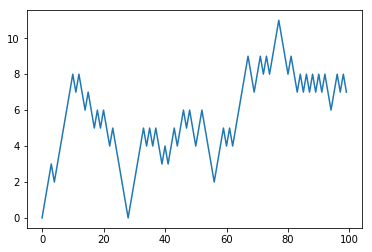

In [285]:
plt.plot(walk[:100]) #畫出前100步

In [276]:
np.random.seed(12345) #以NumPy nd.random模組連續擲硬幣1000次正面為1反面為-1

In [287]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

In [288]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

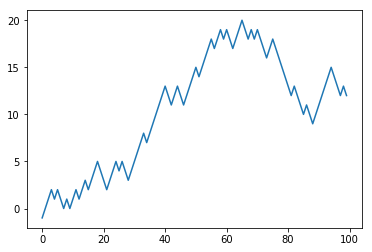

In [279]:
plt.plot(walk[:100])

In [292]:
walk

array([ 1,  0,  1,  2,  3,  4,  3,  2,  3,  4,  5,  4,  3,  2,  3,  4,  5,
        6,  5,  4,  3,  2,  1,  2,  1,  0,  1,  2,  3,  2,  1,  0, -1,  0,
        1,  2,  3,  4,  3,  4,  3,  2,  3,  2,  3,  2,  1,  2,  3,  4,  3,
        4,  5,  6,  5,  6,  5,  6,  5,  4,  3,  4,  5,  6,  5,  6,  5,  6,
        5,  6,  5,  6,  5,  4,  5,  6,  7,  8,  7,  6,  5,  4,  3,  2,  1,
        2,  1,  2,  3,  2,  3,  4,  5,  6,  5,  6,  7,  8,  7,  6,  7,  8,
        9, 10,  9, 10,  9, 10, 11, 12, 11, 12, 11, 12, 13, 14, 15, 16, 15,
       16, 15, 14, 13, 12, 13, 12, 13, 14, 15, 14, 13, 14, 13, 12, 11, 12,
       11, 10, 11, 10, 11, 12, 13, 12, 11, 10, 11, 12, 13, 12, 13, 14, 15,
       16, 15, 16, 15, 14, 15, 16, 17, 18, 19, 20, 21, 22, 21, 22, 23, 22,
       21, 20, 19, 18, 17, 18, 19, 20, 21, 22, 21, 22, 21, 22, 21, 20, 19,
       18, 19, 18, 19, 20, 21, 22, 23, 22, 21, 20, 21, 22, 23, 24, 25, 24,
       23, 24, 23, 22, 21, 22, 21, 22, 23, 24, 25, 24, 23, 24, 23, 22, 21,
       20, 19, 20, 19, 20

In [293]:
walk.min() #walk陣列中最小值

-5

In [294]:
walk.max() #walk陣列中最大值

26

In [296]:
(np.abs(walk) >= 10).argmax() #計算首次穿越時間(first crossing time) 即在第一步我們的漫步可以到達指定值，np.abs(walk)>=10.argmax()想知道
#走多少步路後，才能從0開始到達10步遠的位置，此時就會回傳一個布林陣列，裡面的布林值即標明那些布到達或超過10步遠，不過我們想知道的是何時首次到達
#10或-10，這時候就可以使用argmax來計算，這個函式會在布林陣列上找尋最大值，並傳回其索引(true就是最大值)

103

### Simulating Many Random Walks at Once 一次模擬許多隨機散步

In [261]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

array([[  1,   0,   1, ...,   8,   7,   8],
       [  1,   0,  -1, ...,  34,  33,  32],
       [  1,   0,  -1, ...,   4,   5,   4],
       ...,
       [  1,   2,   1, ...,  24,  25,  26],
       [  1,   2,   3, ...,  14,  13,  14],
       [ -1,  -2,  -3, ..., -24, -23, -22]], dtype=int32)

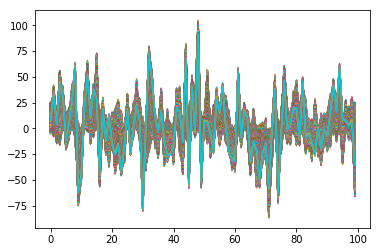

In [299]:
plt.plot(walks[:100])

In [262]:
walks.max()

138

In [263]:
walks.min()

-133

In [264]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30

array([False,  True, False, ..., False,  True, False])

In [265]:
hits30.sum() # Number that hit 30 or -30

3410

In [298]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)#把walks中累加步數絕對值30以上的獵，利用這個布林陣列選出來，然後呼叫argmax沿第一軸
#得到首次穿越時間
crossing_times

array([735, 409, 253, ..., 327, 453, 447], dtype=int64)

In [266]:
crossing_times.mean() #若將隨機值產生函式換成其他像是normal，就可以產生指定平均值和標準差下，常態分佈的漫步值。

498.8897360703812

In [304]:
steps = np.random.normal(loc=0, scale=0.25, size=(nwalks, nsteps))
walks = steps.cumsum(1)

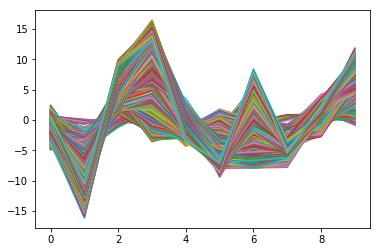

In [305]:
plt.plot(walks[:10])

## Conclusion結論